### 분류모델

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

iris = load_iris()
iris.keys()


iris_data = iris.data

iris_label = iris.target
print('iris target값:',iris_label)
print('iris target명:', iris.target_names)


iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등.
   지니 지수는 얼마나 불확실한가(얼마나 섞여있는가?)를 보여주며 지니지수가 0이란 것은 불확실성이 0이다라는 것으로 같은 특성을 가진 객체끼리 잘 모여있다는 의미
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 하이퍼 파라미터 : 학습 프로세스가 시작되기 전에 설정되는 매개변수로서 의사결정 트리가 구축되는 방식에 영향을 주어 구조와 성능에 영향을 준다.
 - 최대 깊이(max_depth):
    - 설명: 트리의 최대 깊이. 이는 뿌리와 잎 사이의 최대 길이.
    - 영향: 트리가 깊어지면 더 복잡한 패턴을 포착할 수 있지만 과적합이 발생할 수 있다. 더 얕은 나무는 적합하지 않을 수 있다.
 - 최소 샘플 분할(min_samples_split):
    - 설명: 분할을 고려하기 위해 노드에 있어야 하는 최소 샘플 수를 정의.
    - 영향: 값이 높을수록 모델이 매우 특정한 패턴(과적합)을 학습하는 것을 방지하는 반면, 값이 낮을수록 데이터에서 노이즈가 포착될 수 있다.
 - 최소 샘플 리프(min_samples_leaf):
    - 설명: 분할 후 리프 노드에 있어야 하는 최소 샘플 수를 설정.
    - 영향: min_samples_split과 유사하게 과적합을 제어. 값이 높을수록 샘플이 거의 없는 리프 노드가 생성되지 않는다.
 - 최대 기능(max_features):
    - 설명: 노드 분할을 위해 고려되는 최대 기능 수.
    - 영향: 이 수를 줄이면 앙상블 모델에서 트리의 다양성이 증가할 수 있지만 중요한 기능이 제외될 수도 있다.
 - 기준(기준):
    - 설명 : 분할 품질을 측정하는 데 사용되는 기능. 일반적인 기준에는 지니 불순물에 대한 "gini", 분류 트리의 정보 이득에 대한 "엔트로피", 회귀 트리에 대한 "mse"(평균 제곱 오류)가 포함.
    - 영향: 기준 선택은 나무가 자라는 방식에 영향을 미치고 모델 성능에 영향을 미칠 수 있다.
 - 최대 리프 노드(max_leaf_nodes):
    - 설명: 트리의 최대 리프 노드 수.
    - 영향: 트리의 크기와 복잡성을 제어하는 ​​데 사용할 수 있다. 리프 노드가 많을수록 더 복잡한 모델이 가능.

* 장점:
 - 해석성: 전문가가 아니더라도 쉽게 이해하고 해석할 수 있습니다.
 - 데이터 정규화 필요 없음: 데이터 정규화가 필요하지 않습니다.
 - 비선형 관계 처리: 기능 간의 비선형 관계를 처리할 수 있습니다.
* 단점:
 - 과적합: 잡음이 있는 데이터를 과적합하는 경향이 있습니다.
 - 불안정성: 데이터의 작은 변화로 인해 완전히 다른 트리가 나타날 수 있습니다.
 - 편향된 트리: 지배적인 클래스에 편향되어 있습니다.

https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

지니계수 산출 사례
- 지니계수가 0인 경우 완전한 평등 : 소득 배열: [20, 20, 20, 20, 20]
- 지니계수가 1인 경우 한 명만 100의 소득을 가지고, 나머지는 모두 0의 소득 [0, 0, 0, 0, 100]

$G=1−∑
i=1
n
​
 (L
i
​
 +L
i−1
​
 )(P
i
​
 −P
i−1
​
 )=1−(0+0.2)⋅0.2=1−0.2⋅1=1−0=1$

$ 여기서
𝐿
𝑖
L
i
​
 는 누적 소득 비율,
𝑃
𝑖
P
i
​
 는 누적 인구 비율입니다.

인구 비율 (P): [0, 0.2, 0.4, 0.6, 0.8, 1.0]
소득 비율 (L): [0, 0, 0, 0, 0, 1]$

In [ ]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=5, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=4, random_state=156)

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)


dt_clf.fit(X_train,y_train)


from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


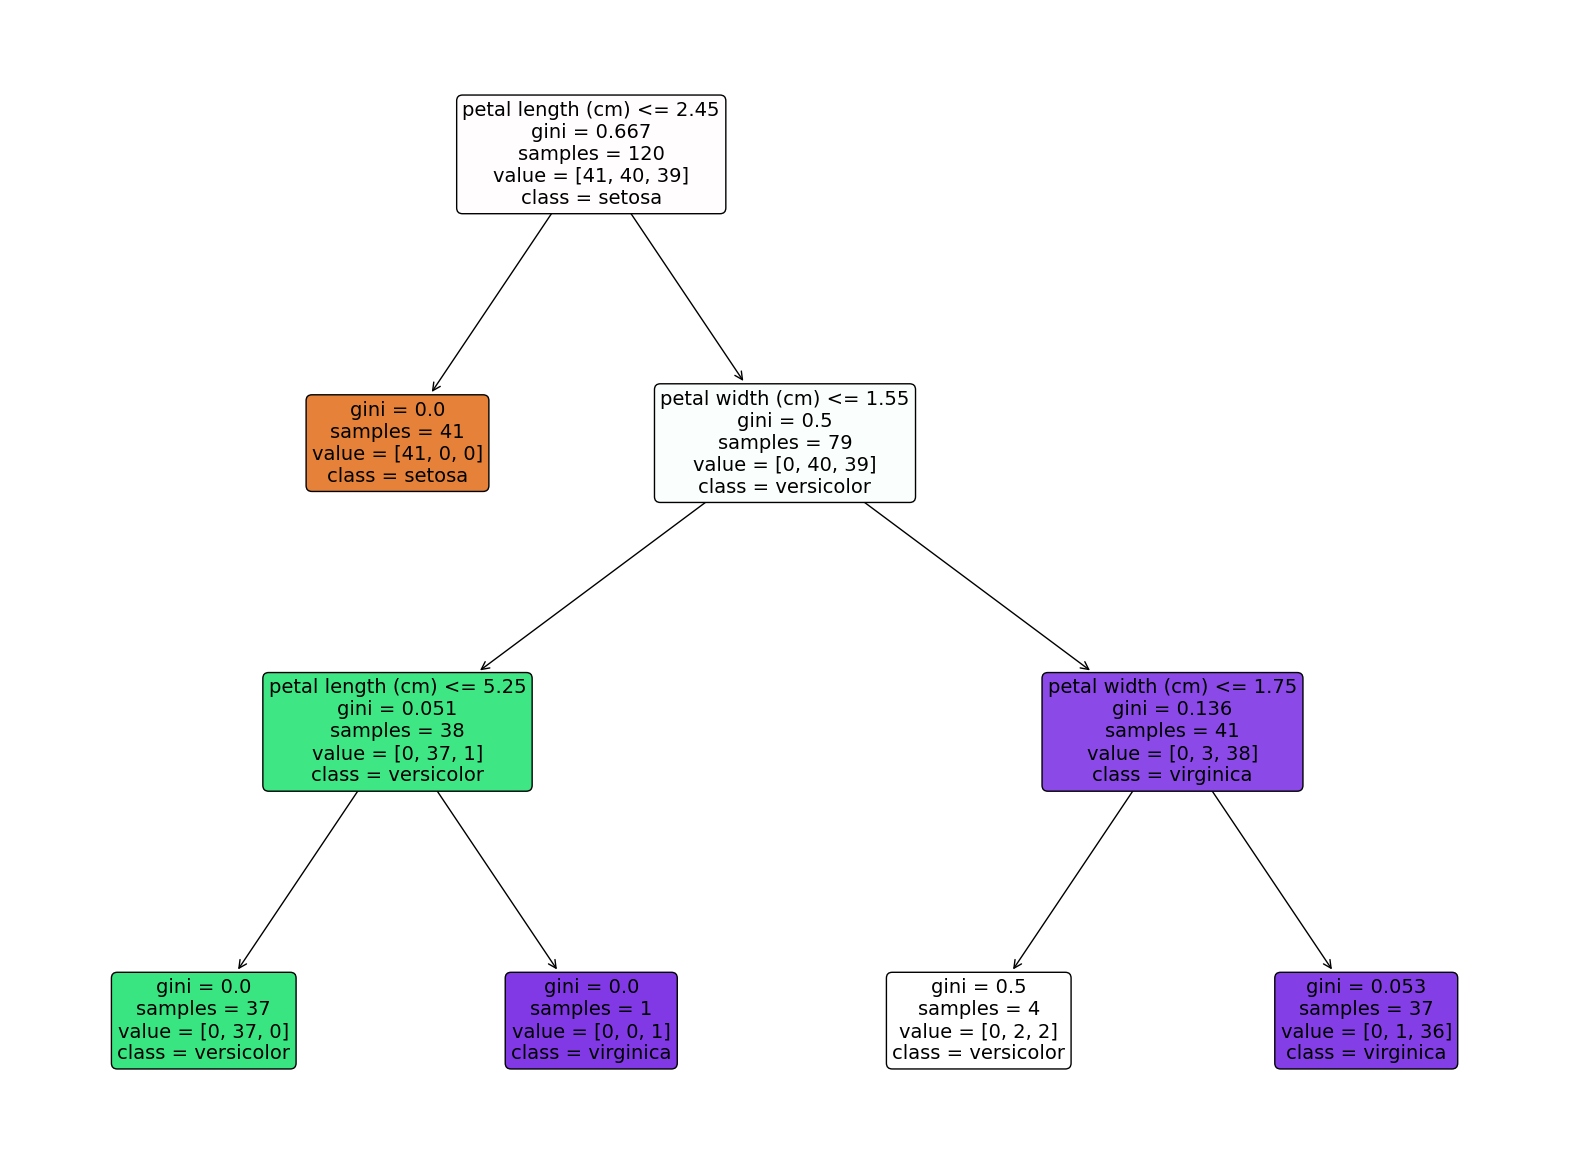

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
# DT 시각화
# gini 계수는 엔트로피와 마찬가지로 낮을수록 분류가 잘된 것으로 판단하며 기본적으로 의사결정 나무는
# gini계수와 엔트로피를 낮추는 방향으로 분류를 진행


plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,
               feature_names=iris_data.feature_names,
               class_names=iris_data.target_names,
               rounded=True, fontsize=14)
plt.show()
plt.close()

In [ ]:
# 꽃잎 길이가 2.0 꽃잎 너비가 0.5인 꽃 => setosa
# 꽃잎 길이가 3.0 꽃잎 너비가 1.2인 꽃 => versicolor
# 꽃잎 길이가 5.0 꽃잎 너비가 2.0인 꽃 => virginica



Feature importance: 
 [0.    0.    0.558 0.442] 

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<Axes: >

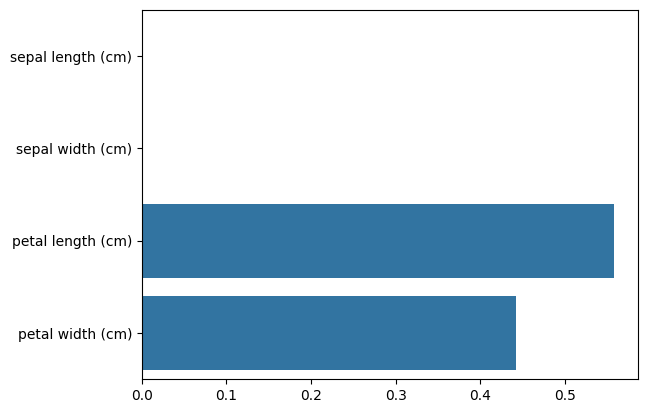

In [ ]:
import seaborn as sns
import numpy as np

# feature improtance 추출
print(f"Feature importance: \n {np.round(dt_clf.feature_importances_,3)}",'\n')

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    # _로 끝나는 속성은 모델이 데이터에 대해 학습을 수행한 후에 생성되는 속성을 의미하며 자동으로 생성 예로 각 특성의 중요도
    print(f'{name} : {value:.3f}')

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

In [ ]:
# Confusion matrix를 활용한 정확도 비교
# 가지치기를 한 의사결정나무의 정확도가 가장 떨어진다. 하지만 학습데이터를 분류한 것이라는 사실을 염두해 두어야한다
# 만약 새로운 데이터가 들어오면 말했듯이 맨 마지막 가지치기의 의사결정나무가 일반화된 특징을 잡을 가능성이 높다
# 1번 의사결정나무 - 지니계수활용
# 2번 의사결정나무 - entropy 활용
# 3번 의사결정나무 - 가지치기 작업
# array[0,0] 50: 실제클래스가 0이면서 예측된 클래스 0인경우(정확한 예측)
# array[1,2] 1: 실제클래스가 1이지만 예측된 클래스가 2인경우(잘못된 예측)
# array[2,1] 4: 실제클래스가 2이지만 예측된 클래스가 1인 경우(잘못된 예측)
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_data.target,dt_clf.predict(iris_data.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

Q. load_breast_cancer 데이터셋을 불러와서 다음을 수행하세요

- dt로 분류모델 생성 및 모델 정확도 평가
- 하이퍼 파라미터는 분할 기준은 지니계수, 최대깊이는 3으로 설정
- 다양한 하이퍼파라미터 설정하여 결과 확인
- 결정트리를 시각화

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

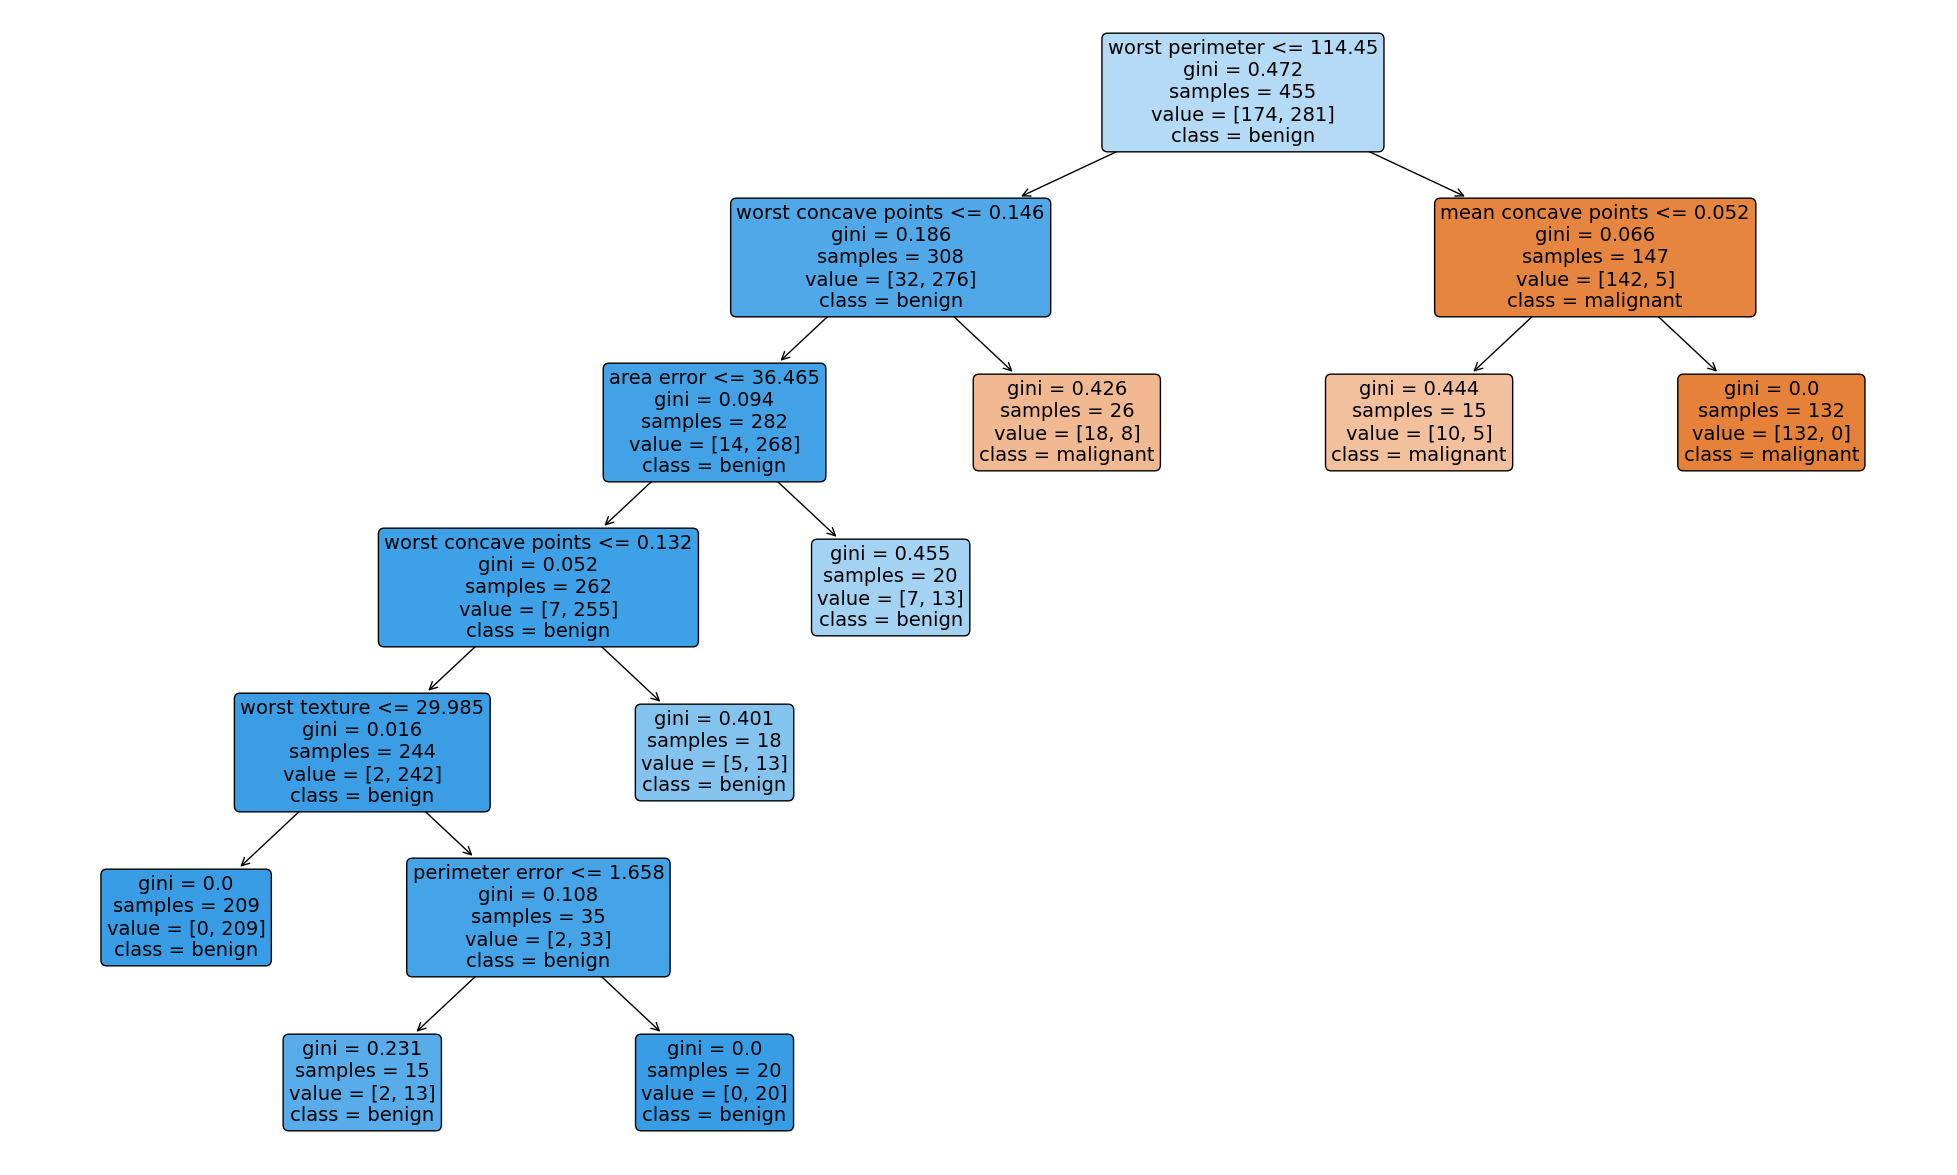

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=11)

# dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=156)
# dt = DecisionTreeClassifier(criterion='gini', min_samples_split=10, random_state=156)
dt = DecisionTreeClassifier(criterion='gini', min_samples_leaf=15, random_state=156)
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

plt.figure(figsize=(25,15))
tree.plot_tree(dt, filled=True,
               feature_names=cancer.feature_names,
               class_names=cancer.target_names,
               rounded=True, fontsize=14)
plt.show()
plt.close()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,
                                                    stratify=cancer.target, random_state=150)
# Stratify(층화 추출)**는 데이터를 분할할 때 각 클래스의 비율을 유지
dt_tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=15, random_state=156)
dt_tree.fit(X_train,y_train)

pred = dt_tree.predict(X_test)

accuracy = accuracy_score(y_test, pred)

print(f'정확도: {round(accuracy,2)}')

정확도: 0.87


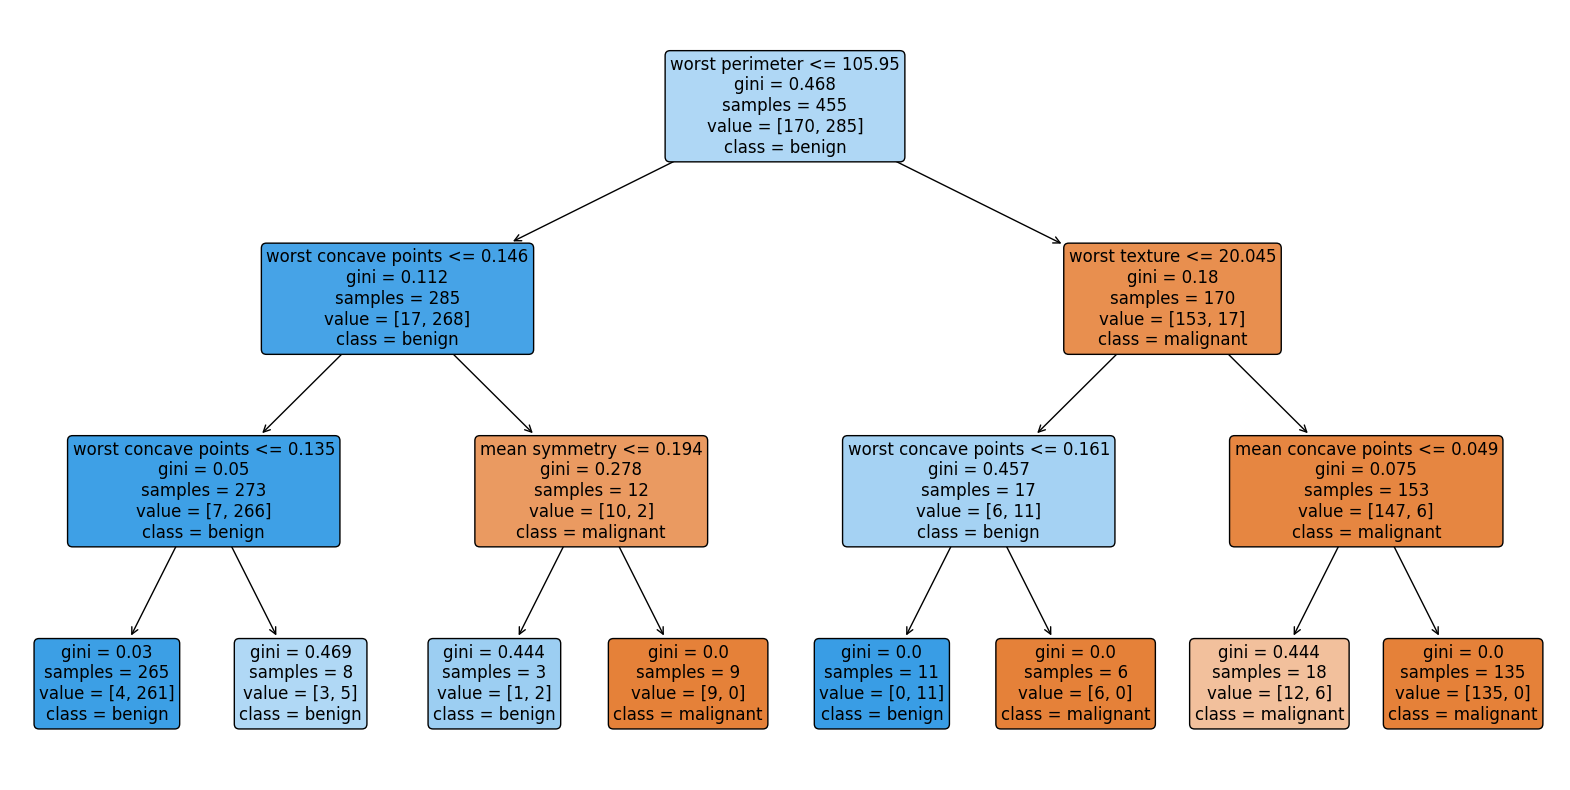

In [ ]:
# 시각화
from sklearn import tree
import matplotlib.pyplot as plt

dt_tree = DecisionTreeClassifier(max_depth=3)
dt_tree.fit(X_train,y_train)
pred = dt_tree.predict(X_test)
plt.figure(figsize=(20,10))
tree.plot_tree(dt_tree, filled=True,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              rounded=True, fontsize=12)
plt.show()
plt.close()

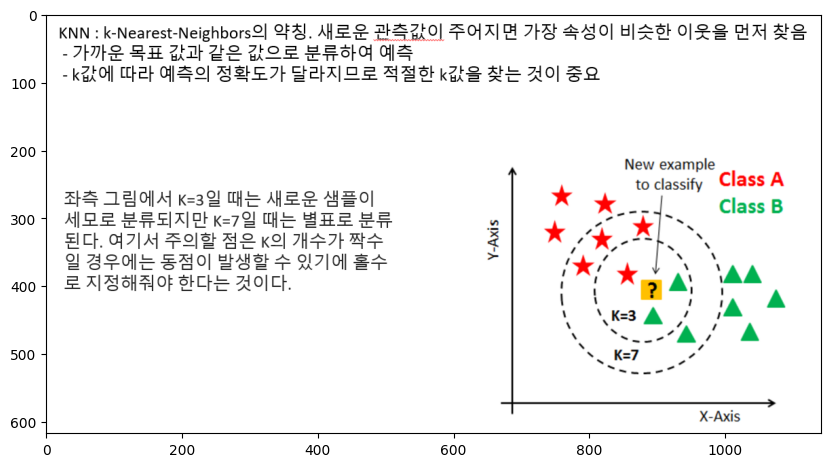

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('KNN.png')

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

k  = 5
knn = KNeighborsClassifier(n_neighbors=k) # default 5, k값은 데이터, 과적합 상황, 이상치 등을 감안해서 설정

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy with k ={k} : {accuracy : .2f}")

Accuracy with k =5 :  0.97


Q. load_breast_cancer 데이터에 대하여 KNN(k=3) 알고리즘을 적용하여 분류 분석 모델링 및 평가를 수행

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()

X, y = cancer.data, cancer.target
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)
# proba = knn.predict_proba(X_test)
# KNeighborsClassifier는 최근접 이웃 분류기이며, predict_proba() 메서드를 지원하지 않습니다. 이 메서드는 일반적으로 확률 예측을 지원하는 분류기(예: 로지스틱 회귀, 랜덤 포레스트 등)에서만 사용

accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred)
recall = recall_score(y_test,pred)

print(f"Accuracy with k ={k} : {accuracy : .2f}")
print(f"Precision with k ={k} : {precision : .2f}")
print(f"Recall with k ={k} : {recall : .2f}")

Accuracy with k =3 :  0.92
Precision with k =3 :  0.93
Recall with k =3 :  0.95



### 서포트 벡터 머신(Support Vector Machines, SVM)

- 분류나 회귀, 이상치 탐지 등에 사용되는 강력한 머신러닝 알고리즘 중 하나입니다. SVM은 주로 분류 문제에 사용되며, 이 알고리즘의 핵심 아이디어는 데이터를 고차원 공간으로 변환하여 서로 다른 클래스 간의 최대 마진을 찾는 것입니다.

- SVM은 데이터를 두 개의 클래스로 나누는 결정 경계(결정 초평면이라고도 함)를 찾습니다. 이 결정 경계는 각 클래스의 가장 가까운 훈련 샘플(서포트 벡터라고 함)까지의 거리가 최대가 되는 선을 찾는 것을 목표로 합니다. 이를 '마진 최대화'라고 하며, 이 마진 최대화는 오류를 최소화하고 모델의 일반화 성능을 향상시키는 데 중요한 역할을 합니다.

- SVM은 선형 뿐만 아니라 비선형 분류 문제에도 사용할 수 있습니다. 비선형 문제를 해결하기 위해, SVM은 커널 트릭이라는 기법을 사용하여 데이터를 고차원 공간으로 변환하고, 그 고차원에서 선형 결정 경계를 찾습니다. 이 커널 트릭 덕분에 SVM은 복잡한 분류 문제를 처리할 수 있습니다.

- SVM은 작은 데이터셋에서도 잘 작동하며, 높은 차원의 데이터에 대해 강력한 성능을 발휘합니다. 그러나 데이터셋이 크거나 노이즈가 많은 경우, 그리고 데이터가 선형적으로 구분되지 않는 경우에는 다른 알고리즘(예: 랜덤 포레스트나 신경망)에 비해 성능이 떨어질 수 있습니다.

https://wooono.tistory.com/111

In [ ]:
from google.colab import files

path ='url'
img = plt.imread(path)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off') #축제거
plt.show()

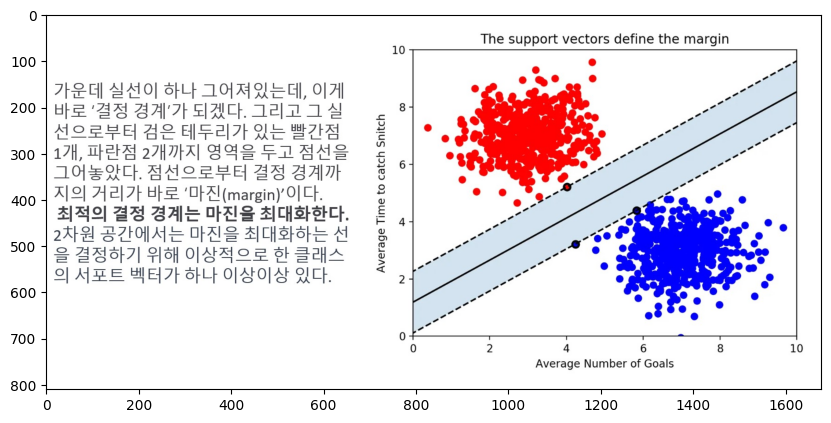

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('SVM.jpg')

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

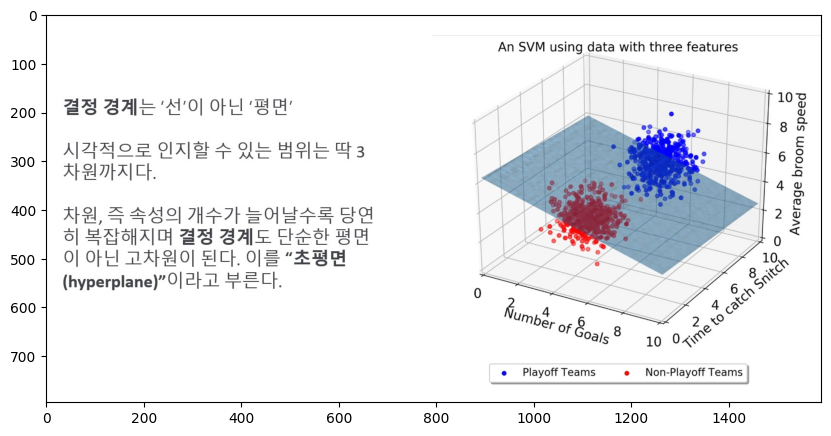

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('SVM2.jpg')

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.show()

kernel
- SVM은 데이터를 분류하기 위해 결정 경계(Decision Boundary)라고 하는 분류선을 그리는데 이 때, kernel 매개변수는 이 결정 경계가 어떤 형태를 가질지 결정한다. kernel='linear'는 선형 결정 경계를 사용한다는 의미. 즉, 데이터가 선형적으로 분리될 수 있다고 가정하고, 그에 따른 최적의 직선을 찾는다. 이는 특징들이 선형 관계에 있다고 가정할 때 효과적. 다른 커널 유형으로는 poly(다항식), rbf(방사 기저 함수), sigmoid 등이 있으며, 이들은 비선형적 데이터를 처리하는 데 유용.

C=1.0
- C 매개변수는 SVM 분류기의 정규화 매개변수. 이 값은 모델이 각각의 데이터 포인트들을 얼마나 정확하게 분류할 것인지를 결정.
- C 값이 높으면 모델은 훈련 데이터에 대해 더 정확하게 분류하려고 하며 이는 결정 경계가 개별 데이터 포인트에 더 밀접하게 맞추어져 있는 상태를 의미. 하지만 이는 과적합(Overfitting)의 위험을 증가시킬 수 있다.
- 반대로 C 값이 낮으면 모델은 이러한 개별 데이터 포인트들에 덜 민감하게 된다. 즉, 결정 경계가 더 많은 데이터 포인트를 잘못 분류할 수 있지만, 일반적으로 더 일반화된(Generalized) 모델을 만들 수 있다.
- C=1.0은 기본값으로, 상대적으로 균형 잡힌 정규화 수준을 제공. 이 값은 문제에 따라 조정될 수 있으며, 특정 데이터셋에 대한 모델의 성능을 최적화하는 데 사용.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

cancer = load_breast_cancer()

X, y = cancer.data, cancer.target

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


svm = SVC(kernel='linear', C=1.0, random_state=42) #kernel='linear'는 선형커널을 사용하겠다는 것이고, C=1.0은 정규화 매개변수

svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy {accuracy : .2f}")

Accuracy  0.96


In [ ]:
cancer = load_breast_cancer()

X, y = cancer.data, cancer.target

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


C_values = [0.01,0.1,1,10,100]

accuracy_dict = {}

for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    accuracy_dict[C] = accuracy
    print(f"C:{C}, Accuracy : {accuracy:.2f}")

C:0.01, Accuracy : 0.97
C:0.1, Accuracy : 0.96
C:1, Accuracy : 0.96
C:10, Accuracy : 0.97
C:100, Accuracy : 0.95


SVC 커널

- 선형 커널 (Linear Kernel): 선형 커널은 간단하고 빠르며, 데이터가 선형적으로 구분될 때 좋은 성능을 보입니다. Wine 데이터셋에서 선형 커널이 적합한지 확인해보면, 일부 클래스 간의 분류가 충분하지 않을 수 있습니다.
- 다항식 커널 (Polynomial Kernel): 다항식 커널은 비선형적으로 분포된 데이터를 더 잘 처리할 수 있습니다. 차수가 증가함에 따라 모델이 더 복잡해지고, 데이터의 패턴을 더 잘 포착할 수 있지만, 과적합의 위험이 있습니다.
- RBF 커널 (RBF Kernel): RBF 커널은 비선형적인 경계를 가진 데이터에서 가장 효과적입니다. Wine 데이터셋의 복잡한 패턴을 잘 포착할 수 있으며, 높은 성능을 기대할 수 있습니다.

Task1_0724.wine 데이터셋에 대하여 SVM 모델에 3개의 커널을 적용하여 학습 및 평가 결과

In [53]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

wine = datasets.load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



C_values = [0.01,0.1,1,10,100]
kernel_values = ['linear','poly','rbf']

for kernel in kernel_values:
    for C in C_values:
        svm = SVC(kernel=kernel, C=C, random_state=42)
        svm.fit(X_train,y_train)
        y_pred = svm.predict(X_test)

        accuracy = accuracy_score(y_test,y_pred)
        print(f"C : {C}, kernel : {kernel}, Accuracy : {accuracy:.2f}")
    print()


C : 0.01, kernel : linear, Accuracy : 1.00
C : 0.1, kernel : linear, Accuracy : 1.00
C : 1, kernel : linear, Accuracy : 0.98
C : 10, kernel : linear, Accuracy : 1.00
C : 100, kernel : linear, Accuracy : 1.00

C : 0.01, kernel : poly, Accuracy : 0.69
C : 0.1, kernel : poly, Accuracy : 0.70
C : 1, kernel : poly, Accuracy : 0.76
C : 10, kernel : poly, Accuracy : 0.76
C : 100, kernel : poly, Accuracy : 0.81

C : 0.01, kernel : rbf, Accuracy : 0.39
C : 0.1, kernel : rbf, Accuracy : 0.74
C : 1, kernel : rbf, Accuracy : 0.76
C : 10, kernel : rbf, Accuracy : 0.76
C : 100, kernel : rbf, Accuracy : 0.78



####  앙상블 학습

* 앙상블 학습의 유형은 보팅, 배깅, 부스팅 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
* 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이다.
* 정형 데이터의 예측 분석 영역에서는 매우 높은 예측 성능. Bagging 과 Boosting
* 배깅 방식의 대표인 Random Forest는 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성 등으로 애용.
* 부스팅의 효시는 Gradient Boosting, 한 단계 발전시키면서도 시간 단축시킨 XgBoost, LightGBM이 정형 데이터의 분류 영역에서
  활용도 확대
* 앙상블의 앙상블이라고 불리는 스태킹 기법
* 앙상블의 기본 알고리즘은 결정 트리

Voting Classifier
- 하드 보팅 : 다수결 원칙, 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정
- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더해서 평균하고 이들 중 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

In [ ]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# 경고 메시지는 모델이 더 나은 수렴을 위해 어떤 조치를 취해야 할지를 알려주는 중요한 정보입니다. 위의 방법들 중 하나를 적용하여 경고를 해결하고 모델의 성능을 개선
# 해결방안 1: 데이터 스케일링
# 반복적인 최적화 알고리즘을 사용하여 학습/이 경고는 선택한 최적화 알고리즘이 수렴하지 않고 반복 횟수 제한에 도달했음
# 2: 매개변수를 늘리기: 기본적으로 설정된 반복 횟수 제한을 늘리기
# 개별 모델은 로지스틱 회귀와 KNN임

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=9) # 되도록 홀수, 짝수일 땐 거리순으로


# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)


print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9649


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임
from sklearn.preprocessing import StandardScaler
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=9) # 되도록 홀수, 짝수일 땐 거리순으로


# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 156)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.3246
LogisticRegression 정확도 : 0.3246
KNeighborsClassifier 정확도 : 0.3246


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(max_iter=10000,solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=9) # 되도록 홀수, 짝수일 땐 거리순으로


# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state = 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9474
LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9649


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 기존의 Logistic Regression과 KNN 분류기
lr_clf = LogisticRegression(max_iter=10000, solver='lbfgs')
knn_clf = KNeighborsClassifier(n_neighbors=9)

# 추가할 분류기들
dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)
svm_clf = SVC(probability=True, random_state=156)  # probability=True로 설정하여 소프트 보팅 가능하도록 함

# 소프트 보팅 앙상블 모델
vo_clf = VotingClassifier(estimators=[
    ('LR', lr_clf),
    ('KNN', knn_clf),
    ('Decision Tree', dt_clf),
    ('Random Forest', rf_clf),
    ('SVM', svm_clf)
], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)

print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 각 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf, dt_clf, rf_clf, svm_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))


Voting 분류기 정확도 : 0.9561
LogisticRegression 정확도 : 0.9649
KNeighborsClassifier 정확도 : 0.9649
DecisionTreeClassifier 정확도 : 0.9386
RandomForestClassifier 정확도 : 0.9474
SVC 정확도 : 0.9298


#### Random Forest
여러 개의 의사결정 트리(Decision Trees)를 조합하여 작동하는 앙상블 학습 방법의 하나로 다수의 의사결정 트리를 생성하고, 각각의 트리가 데이터에 대한 예측을 수행한 후, 이 예측들을 결합하여 최종 예측 결과를 도출

베깅(Bagging), 또는 부트스트랩 어그리게이팅(Bootstrap Aggregating)은 앙상블 학습 방법 중 하나로, 모델의 분산을 줄이고 오버피팅을 방지하기 위해 사용.

베깅의 핵심 아이디어와 방식

- 부트스트랩 샘플링:
베깅은 원본 훈련 데이터 세트에서 복원 추출 방식(하나의 데이터 포인트를 여러 번 샘플링할 수 있음)을 사용하여 여러 개의 서브셋(부트스트랩 샘플)을 생성. 각 부트스트랩 샘플은 원본 데이터 세트와 크기는 같지만, 일부 데이터는 중복되고 일부 데이터는 누락될 수 있다.
- 독립적인 모델 훈련:
생성된 각 서브셋은 독립적인 모델(예: 의사결정 트리)을 훈련시키는 데 사용. 이렇게 함으로써, 각 모델은 데이터의 다른 측면을 학습하게 된다.
- 결과의 결합:
훈련된 모든 모델의 예측 결과는 결합되어 최종 결과를 생성.
분류 문제의 경우, 일반적으로 다수결(voting) 방식이 사용되며, 회귀 문제의 경우에는 평균이 사용.

베깅의 장점
- 분산 감소: 여러 모델의 예측을 결합함으로써 개별 모델이 가질 수 있는 높은 분산을 줄일 수 있다.
- 오버피팅 방지: 부트스트랩 샘플링으로 인해 각 모델이 훈련 데이터의 다른 측면을 학습하므로, 오버피팅을 방지하는 데 도움이 된다.
- 병렬 처리 가능: 각 모델은 독립적으로 훈련되므로, 병렬 처리가 가능해져 계산 효율성이 높다.

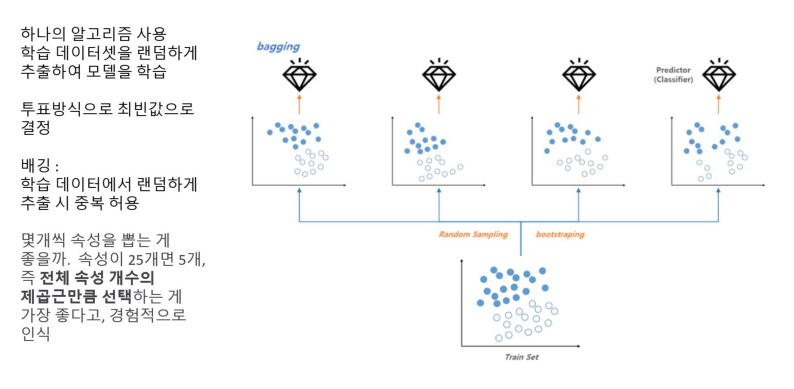

In [41]:
from google.colab import files

path ='/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/bagging.jpg'
img = plt.imread(path)

plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off') #축제거
plt.show()

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy {accuracy : .2f}")

Accuracy  0.97


주요 하이퍼파라미터

n_estimators:
- 설명: 랜덤포레스트에 포함될 결정 트리의 개수를 지정합니다.
- 기본값: 100
- 영향: 트리의 개수가 많을수록 모델의 안정성과 성능이 향상될 수 있지만, 연산 비용도 증가합니다.

max_depth:
- 설명: 각 트리의 최대 깊이를 설정합니다.
- 기본값: None (리프 노드가 순수해질 때까지 또는 min_samples_split보다 적은 샘플을 가질 때까지 계속 분할)
- 영향: 깊이가 깊을수록 모델이 복잡해지고 과적합할 가능성이 커집니다.

min_samples_split:
- 설명: 내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
- 기본값: 2
- 영향: 큰 값은 과적합을 방지하는 데 도움이 됩니다.

min_samples_leaf:
- 설명: 리프 노드에 있어야 하는 최소 샘플 수입니다.
- 기본값: 1
- 영향: 큰 값은 과적합을 방지하고, 트리의 일반화 능력을 향상시킬 수 있습니다.

max_features:
- 설명: 각 분할에서 고려할 최대 특성 수입니다.
- 옵션: auto, sqrt, log2, 또는 정수 값
- 기본값: auto (모든 특성을 사용)
- 영향: 특성 수가 적을수록 모델의 다양성이 증가하지만, 너무 적으면 성능이 떨어질 수 있습니다.

Task2_0724. breast_cancer dataset으로 랜덤포레스트를 적용하여 모델링 및 평가를 아래의 하이퍼 파라미터를 이용하여 수행한 후 최적의 하이퍼파라미터를 구하세요.

- 'n_estimators': [50, 100, 200],
- 'max_depth': [None, 10, 20],
- 'max_features': ['auto', 'sqrt', 'log2'],
- 'min_samples_split': [2, 5, 10],
- 'min_samples_leaf': [1, 2, 4]

In [66]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

wine = datasets.load_breast_cancer()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_values = [50, 100, 200]
max_depth= [None, 10, 20]
max_features = ['auto', 'sqrt', 'log2'] # sqrt /경고가뜸
min_samples_split = [2, 5, 10] #2
min_samples_leaf = [1, 2, 4] # 1,4


# for n in max_depth:
#     for m in min_samples_leaf:
#         # clf = RandomForestClassifier(n_estimators=n, max_depth= m, random_state=42)
#         clf = RandomForestClassifier(max_depth=n, min_samples_leaf= m, random_state=42)
#         clf.fit(X_train, y_train)

#         y_pred = clf.predict(X_test)

#         accuracy = accuracy_score(y_test,y_pred)
#         print(f"Accuracy {accuracy : .2f}")
#     print()

clf = RandomForestClassifier(n_estimators=50, max_depth= None, max_features = 'sqrt',min_samples_split=2, min_samples_leaf =1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy {accuracy : .2f}")

Accuracy  0.97
